In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set()



In [2]:
columns = 'country code year num_exec meningitis neoplasms fire malaria drowning interpersonal aids drugs tuberculosis road maternal lower_respiratory neonatal alcohol nature diarrhea environment protein_deficiency self_harm conflict diabetes poison malnutrition terrorism cardiovascular kidney respiratory liver digestive hepatitis alzheimers parkinsons'.split()

def fix_empty(x):
    return 0 if len(x) == 0 else x

df = pd.read_csv('../DATA/20220327_annual-number-of-deaths-by-cause.csv', names=columns, skiprows=1, converters={"num_exec": fix_empty})
df


,country,code,year,num_exec,meningitis,neoplasms,fire,malaria,drowning,interpersonal,...,malnutrition,terrorism,cardiovascular,kidney,respiratory,liver,digestive,hepatitis,alzheimers,parkinsons
0,Afghanistan,AFG,2007,15,2933.0,15925.0,481.0,393.0,2127.0,3657.0,...,2439.0,1199.0,53962.0,4490.0,7222.0,3346.0,6458.0,3437.0,1402.0,450.0
1,Afghanistan,AFG,2008,17,2731.0,16148.0,462.0,255.0,1973.0,3785.0,...,2231.0,1092.0,54051.0,4534.0,7143.0,3316.0,6408.0,3005.0,1424.0,455.0
2,Afghanistan,AFG,2009,0,2460.0,16383.0,448.0,239.0,1852.0,3874.0,...,1998.0,1065.0,53964.0,4597.0,7045.0,3291.0,6358.0,2663.0,1449.0,460.0
3,Afghanistan,AFG,2011,2,2327.0,17094.0,448.0,390.0,1775.0,4170.0,...,1805.0,1525.0,54347.0,4785.0,6916.0,3318.0,6370.0,2365.0,1508.0,473.0
4,Afghanistan,AFG,2012,14,2254.0,17522.0,445.0,94.0,1716.0,4245.0,...,1667.0,3521.0,54868.0,4846.0,6878.0,3353.0,6398.0,2264.0,1544.0,482.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,Zimbabwe,ZWE,2015,0,1439.0,11161.0,632.0,2518.0,770.0,1302.0,...,2990.0,NaN,16649.0,2108.0,2751.0,1956.0,4202.0,146.0,754.0,215.0
8250,Zimbabwe,ZWE,2016,0,1457.0,11465.0,648.0,2050.0,801.0,1342.0,...,3027.0,NaN,16937.0,2160.0,2788.0,1962.0,4264.0,146.0,767.0,219.0
8251,Zimbabwe,ZWE,2017,0,1460.0,11744.0,654.0,2116.0,818.0,1363.0,...,2962.0,0.0,17187.0,2196.0,2818.0,2007.0,4342.0,144.0,781.0,223.0
8252,Zimbabwe,ZWE,2018,0,1450.0,12038.0,657.0,2088.0,825.0,1396.0,...,2890.0,NaN,17460.0,2240.0,2849.0,2030.0,4377.0,139.0,795.0,227.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8254 entries, 0 to 8253
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             8254 non-null   object 
 1   code                6206 non-null   object 
 2   year                8254 non-null   int64  
 3   num_exec            8254 non-null   object 
 4   meningitis          8010 non-null   float64
 5   neoplasms           8010 non-null   float64
 6   fire                8010 non-null   float64
 7   malaria             8010 non-null   float64
 8   drowning            8010 non-null   float64
 9   interpersonal       8010 non-null   float64
 10  aids                8010 non-null   float64
 11  drugs               8010 non-null   float64
 12  tuberculosis        8010 non-null   float64
 13  road                8010 non-null   float64
 14  maternal            8010 non-null   float64
 15  lower_respiratory   8010 non-null   float64
 16  neonat

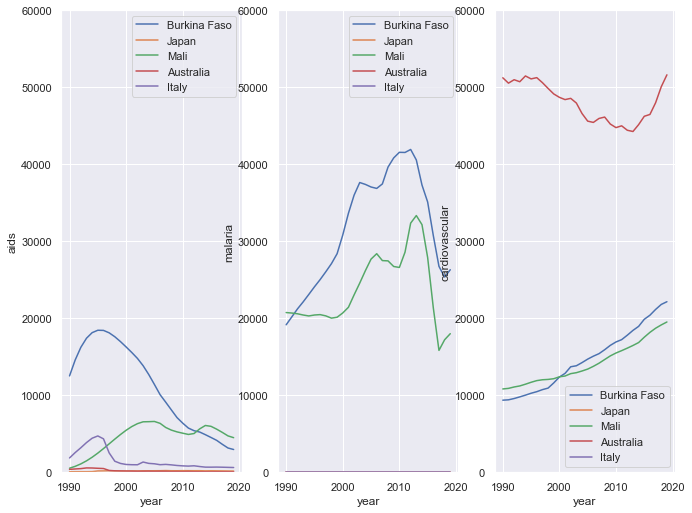

In [37]:

data_by_country = df.groupby('country')
countries = 'Burkina Faso', 'Japan', 'Mali', 'Australia', 'Italy'
causes = 'aids', 'malaria', 'cardiovascular'
num_causes = len(causes)

sns.set(rc={'figure.figsize':(11,8.5)})

for i, cause in enumerate(causes, 1):
    ax = plt.subplot(1, num_causes, i)
    for country in countries:
        country_data = data_by_country.get_group(country)
        sns.lineplot(data=country_data, x='year', y=cause, label=country)
        plt.ylim([0,60000])

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)


In [69]:
gb = df.groupby('country')
aids = gb['aids'].mean().sort_values()

country
Ethiopia                                   5.961430e+04
Central sub-Saharan Africa                 5.985753e+04
Zimbabwe                                   6.120140e+04
America                                    6.335780e+04
Region of the Americas                     6.335780e+04
Southeast Asia, East Asia, and Oceania     6.371243e+04
East Asia & Pacific - World Bank region    6.395700e+04
Uganda                                     7.007223e+04
Nigeria                                    7.389060e+04
India                                      8.181247e+04
Tanzania                                   8.216823e+04
South Asia - World Bank region             8.457010e+04
Kenya                                      8.611797e+04
South-East Asia Region                     1.158084e+05
Asia                                       1.508366e+05
South Africa                               1.624765e+05
Western sub-Saharan Africa                 1.929972e+05
Southern sub-Saharan Africa             